### Modelling

In [155]:
import numpy as np
import pandas as pd

In [156]:
df = pd.read_csv("label_features.csv")

In [157]:
df['datetime']=pd.to_datetime(df['datetime'])

In [158]:
last_train_date = pd.to_datetime('2015-07-31 01:00:00')
first_test_date = pd.to_datetime('2015-08-01 01:00:00')

In [159]:
y_train = df.loc[df['datetime'] < last_train_date, 'failure']

In [160]:
y_train

0         none
1         none
2         none
3         none
4         none
          ... 
290102    none
290103    none
290104    none
290105    none
290106    none
Name: failure, Length: 167922, dtype: object

In [161]:
X_train = pd.get_dummies(df.loc[df['datetime'] < last_train_date].drop(['datetime','machineID','failure'], 1))

In [162]:
X_train

,volt_mean_3h,rotate_mean_3h,pressure_mean_3h,vibration_mean_3h,volt_sd_3h,rotate_sd_3h,pressure_sd_3h,vibration_sd_3h,volt_mean_24h,rotate_mean_24h,...,error5count,comp1,comp2,comp3,comp4,age,model_model1,model_model2,model_model3,model_model4
0,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,169.733809,445.179865,...,0.0,20.000,215.000,155.000,170.000,18,0,0,1,0
1,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,170.614862,446.364859,...,0.0,20.125,215.125,155.125,170.125,18,0,0,1,0
2,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,169.893965,447.009407,...,0.0,20.250,215.250,155.250,170.250,18,0,0,1,0
3,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,171.243444,444.233563,...,0.0,20.375,215.375,155.375,170.375,18,0,0,1,0
4,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,170.792486,448.440437,...,0.0,20.500,215.500,155.500,170.500,18,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290102,181.789600,443.816655,95.819894,39.563678,4.020958,16.224728,7.755167,2.474557,169.097102,443.777605,...,0.0,3.250,3.250,18.250,63.250,5,0,0,0,1
290103,173.083263,438.704284,94.424390,39.083103,11.783864,66.494982,9.682734,6.214271,169.631344,440.478164,...,0.0,3.375,3.375,18.375,63.375,5,0,0,0,1
290104,174.048390,433.016353,99.925802,40.676765,4.574859,25.076437,11.605534,5.577813,171.633464,441.192273,...,0.0,3.500,3.500,18.500,63.500,5,0,0,0,1
290105,167.883990,435.511531,96.602542,38.877619,10.131349,55.710554,1.266057,7.099589,172.057946,441.976196,...,0.0,3.625,3.625,18.625,63.625,5,0,0,0,1


In [163]:
X_test = pd.get_dummies(df.loc[df['datetime'] > first_test_date].drop(['datetime','machineID','failure'], 1))

In [164]:
X_test

,volt_mean_3h,rotate_mean_3h,pressure_mean_3h,vibration_mean_3h,volt_sd_3h,rotate_sd_3h,pressure_sd_3h,vibration_sd_3h,volt_mean_24h,rotate_mean_24h,...,error5count,comp1,comp2,comp3,comp4,age,model_model1,model_model2,model_model3,model_model4
1687,157.906797,436.223066,99.668710,41.927731,14.311694,48.891917,8.484343,5.750070,164.944552,441.048553,...,0.0,12.875,27.875,57.875,42.875,18,0,0,1,0
1688,177.484300,474.384707,95.465206,36.536615,11.467069,52.263950,7.914226,5.928830,164.661214,440.351473,...,0.0,13.000,28.000,58.000,43.000,18,0,0,1,0
1689,160.722230,454.141020,96.239534,37.227385,11.720061,60.893656,16.558994,0.510792,164.970697,440.269094,...,0.0,13.125,28.125,58.125,43.125,18,0,0,1,0
1690,164.327403,483.343506,93.766954,37.099411,11.158956,36.377145,5.826244,5.443107,163.763336,451.041246,...,0.0,13.250,28.250,58.250,43.250,18,0,0,1,0
1691,168.114265,459.958711,100.904301,40.966879,21.079445,70.966810,8.388908,4.248384,166.217269,456.208120,...,0.0,13.375,28.375,58.375,43.375,18,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291336,177.758754,458.391629,103.183160,46.846592,13.147011,75.100940,3.111700,3.576693,169.764418,454.478787,...,0.0,82.500,7.500,82.500,52.500,5,0,0,0,1
291337,166.078945,424.431184,98.344409,30.907459,29.351231,69.348245,16.940674,3.731256,171.547643,452.351565,...,0.0,82.625,7.625,82.625,52.625,5,0,0,0,1
291338,158.327984,504.056262,108.055441,40.109705,9.605817,78.036116,9.154932,3.379639,168.806645,459.502212,...,0.0,82.750,7.750,82.750,52.750,5,0,0,0,1
291339,170.306956,438.653616,102.346227,47.481232,8.457322,43.021553,0.785721,3.198928,169.011763,465.923073,...,0.0,82.875,7.875,82.875,52.875,5,0,0,0,1


In [165]:
X_test.shape,X_train.shape,y_train.shape

((122619, 30), (167922, 30), (167922,))

In [166]:
yf = pd.DataFrame(df.loc[df['datetime'] > first_test_date])

In [167]:
yf

,machineID,datetime,volt_mean_3h,rotate_mean_3h,pressure_mean_3h,vibration_mean_3h,volt_sd_3h,rotate_sd_3h,pressure_sd_3h,vibration_sd_3h,...,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
1687,1,2015-08-01 03:00:00,157.906797,436.223066,99.668710,41.927731,14.311694,48.891917,8.484343,5.750070,...,0.0,0.0,0.0,12.875,27.875,57.875,42.875,model3,18,none
1688,1,2015-08-01 06:00:00,177.484300,474.384707,95.465206,36.536615,11.467069,52.263950,7.914226,5.928830,...,0.0,0.0,0.0,13.000,28.000,58.000,43.000,model3,18,none
1689,1,2015-08-01 09:00:00,160.722230,454.141020,96.239534,37.227385,11.720061,60.893656,16.558994,0.510792,...,0.0,0.0,0.0,13.125,28.125,58.125,43.125,model3,18,none
1690,1,2015-08-01 12:00:00,164.327403,483.343506,93.766954,37.099411,11.158956,36.377145,5.826244,5.443107,...,0.0,0.0,0.0,13.250,28.250,58.250,43.250,model3,18,none
1691,1,2015-08-01 15:00:00,168.114265,459.958711,100.904301,40.966879,21.079445,70.966810,8.388908,4.248384,...,0.0,0.0,0.0,13.375,28.375,58.375,43.375,model3,18,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291336,100,2015-12-31 18:00:00,177.758754,458.391629,103.183160,46.846592,13.147011,75.100940,3.111700,3.576693,...,0.0,0.0,0.0,82.500,7.500,82.500,52.500,model4,5,none
291337,100,2015-12-31 21:00:00,166.078945,424.431184,98.344409,30.907459,29.351231,69.348245,16.940674,3.731256,...,0.0,0.0,0.0,82.625,7.625,82.625,52.625,model4,5,none
291338,100,2016-01-01 00:00:00,158.327984,504.056262,108.055441,40.109705,9.605817,78.036116,9.154932,3.379639,...,0.0,0.0,0.0,82.750,7.750,82.750,52.750,model4,5,none
291339,100,2016-01-01 03:00:00,170.306956,438.653616,102.346227,47.481232,8.457322,43.021553,0.785721,3.198928,...,0.0,0.0,0.0,82.875,7.875,82.875,52.875,model4,5,none


In [168]:
y_test = yf['failure'] 

In [169]:
y_test

1687      none
1688      none
1689      none
1690      none
1691      none
          ... 
291336    none
291337    none
291338    none
291339    none
291340    none
Name: failure, Length: 122619, dtype: object

### GradientBoostingClassifier

In [170]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [171]:
test_results=[]
models=[]
test_result = pd.DataFrame(df.loc[df['datetime'] > first_test_date])
test_result['predicted_failure'] = gbc.predict(X_test)
test_results.append(test_result)

Text(0, 0.5, 'Importance')

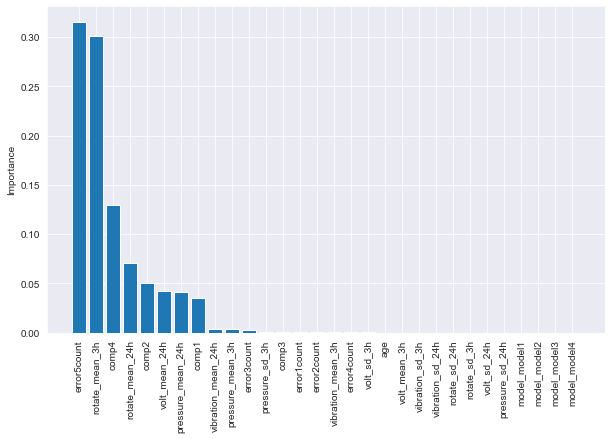

In [172]:

models.append(gbc)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import operator

sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
labels, importances = zip(*sorted(zip(X_test.columns, models[0].feature_importances_),
                                  reverse=True,
                                  key=operator.itemgetter(1)))
plt.xticks(range(len(labels)), labels)
_, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.bar(range(len(importances)), importances)
plt.ylabel('Importance')

In [173]:
evaluation_results = []
for i, test_result in enumerate(test_results):
    print('\nSplit %d:' % (i+1))
    evaluation_result = Evaluate(actual = test_result['failure'],
                                 predicted = test_result['predicted_failure'],
                                 labels = ['none', 'comp1', 'comp2', 'comp3', 'comp4'])
    evaluation_results.append(evaluation_result)
evaluation_results[0]  # show full results for first split only


Split 1:
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels
[[122156      8      3    148      1]
 [     4     53      3      5      1]
 [     2     25     34     51      0]
 [     0      3      0     49      0]
 [     2     70      0      0      1]]


,none,comp1,comp2,comp3,comp4
accuracy,0.997341,0.997341,0.997341,0.997341,0.997341
precision,0.999935,0.333333,0.850000,0.193676,0.333333
recall,0.998692,0.803030,0.303571,0.942308,0.013699
F1,0.999313,0.471111,0.447368,0.321311,0.026316


In [174]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score

def Evaluate(predicted, actual, labels):
    output_labels = []
    output = []
    
    # Calculate and display confusion matrix
    cm = confusion_matrix(actual, predicted, labels=labels)
    print('Confusion matrix\n- x-axis is true labels (none, comp1, etc.)\n- y-axis is predicted labels')
    print(cm)
    
    # Calculate precision, recall, and F1 score
    accuracy = np.array([float(np.trace(cm)) / np.sum(cm)] * len(labels))
    precision = precision_score(actual, predicted, average=None, labels=labels)
    recall = recall_score(actual, predicted, average=None, labels=labels)
    f1 = 2 * precision * recall / (precision + recall)
    output.extend([accuracy.tolist(), precision.tolist(), recall.tolist(), f1.tolist()])
    output_labels.extend(['accuracy', 'precision', 'recall', 'F1'])
    
   
    output_df = pd.DataFrame(output, columns=labels)
    output_df.index = output_labels
                  
    return output_df

In [175]:
test_result['failure'].value_counts(), test_result['predicted_failure'].value_counts()

(none     122316
 comp2       112
 comp4        73
 comp1        66
 comp3        52
 Name: failure, dtype: int64, none     122164
 comp3       253
 comp1       159
 comp2        40
 comp4         3
 Name: predicted_failure, dtype: int64)

### RandomForestClassifier

In [176]:
from sklearn.ensemble import RandomForestClassifier
rnd = RandomForestClassifier(random_state=32)
rnd.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=32, verbose=0,
                       warm_start=False)

In [177]:
rnd.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=32, verbose=0,
                       warm_start=False)

In [178]:
test_results=[]
models=[]
test_result = pd.DataFrame(df.loc[df['datetime'] > first_test_date])
test_result['predicted_failure'] = rnd.predict(X_test)
test_results.append(test_result)

Text(0, 0.5, 'Importance')

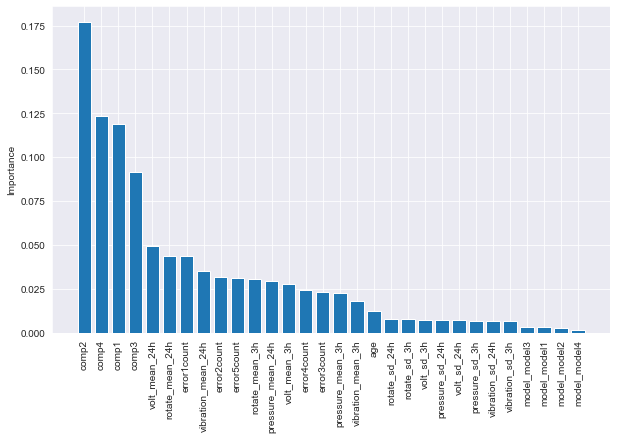

In [179]:
models.append(rnd)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import operator

sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
labels, importances = zip(*sorted(zip(X_test.columns, models[0].feature_importances_),
                                  reverse=True,
                                  key=operator.itemgetter(1)))
plt.xticks(range(len(labels)), labels)
_, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.bar(range(len(importances)), importances)
plt.ylabel('Importance')

In [180]:
evaluation_results = []
for i, test_result in enumerate(test_results):
    print('\nSplit %d:' % (i+1))
    evaluation_result = Evaluate(actual = test_result['failure'],
                                 predicted = test_result['predicted_failure'],
                                 labels = ['none', 'comp1', 'comp2', 'comp3', 'comp4'])
    evaluation_results.append(evaluation_result)
evaluation_results[0]  # show full results for first split only


Split 1:
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels
[[122316      0      0      0      0]
 [     0     61      3      0      2]
 [     0      0    110      0      2]
 [     1      3      2     45      1]
 [     0      1      5      0     67]]


,none,comp1,comp2,comp3,comp4
accuracy,0.999837,0.999837,0.999837,0.999837,0.999837
precision,0.999992,0.938462,0.916667,1.000000,0.930556
recall,1.000000,0.924242,0.982143,0.865385,0.917808
F1,0.999996,0.931298,0.948276,0.927835,0.924138


In [181]:
test_result['failure'].value_counts(), test_result['predicted_failure'].value_counts()

(none     122316
 comp2       112
 comp4        73
 comp1        66
 comp3        52
 Name: failure, dtype: int64, none     122317
 comp2       120
 comp4        72
 comp1        65
 comp3        45
 Name: predicted_failure, dtype: int64)

### Decision Tree

In [182]:
from sklearn.tree import DecisionTreeClassifier
dst = DecisionTreeClassifier(random_state=12)
dst.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12, splitter='best')

In [183]:
test_results=[]
models=[]
test_result = pd.DataFrame(df.loc[df['datetime'] > first_test_date])
test_result['predicted_failure'] = svm.predict(X_test)
test_results.append(test_result)

In [184]:
evaluation_results = []
for i, test_result in enumerate(test_results):
    print('\nSplit %d:' % (i+1))
    evaluation_result = Evaluate(actual = test_result['failure'],
                                 predicted = test_result['predicted_failure'],
                                 labels = ['none', 'comp1', 'comp2', 'comp3', 'comp4'])
    evaluation_results.append(evaluation_result)
evaluation_results[0] 


Split 1:
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels
[[122211     38     67      0      0]
 [    42     22      1      1      0]
 [    49      3     60      0      0]
 [    48      1      2      1      0]
 [    63      1      7      0      2]]


,none,comp1,comp2,comp3,comp4
accuracy,0.997366,0.997366,0.997366,0.997366,0.997366
precision,0.998350,0.338462,0.437956,0.500000,1.000000
recall,0.999142,0.333333,0.535714,0.019231,0.027397
F1,0.998746,0.335878,0.481928,0.037037,0.053333


In [185]:
test_result['failure'].value_counts(), test_result['predicted_failure'].value_counts()

(none     122316
 comp2       112
 comp4        73
 comp1        66
 comp3        52
 Name: failure, dtype: int64, none     122413
 comp2       137
 comp1        65
 comp3         2
 comp4         2
 Name: predicted_failure, dtype: int64)

### SVM

In [186]:
from sklearn.linear_model import SGDClassifier
svm = SGDClassifier(random_state=12)
svm.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=12, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [187]:
test_results=[]
models=[]
test_result = pd.DataFrame(df.loc[df['datetime'] > first_test_date])
test_result['predicted_failure'] = svm.predict(X_test)
test_results.append(test_result)

In [188]:
evaluation_results = []
for i, test_result in enumerate(test_results):
    print('\nSplit %d:' % (i+1))
    evaluation_result = Evaluate(actual = test_result['failure'],
                                 predicted = test_result['predicted_failure'],
                                 labels = ['none', 'comp1', 'comp2', 'comp3', 'comp4'])
    evaluation_results.append(evaluation_result)
evaluation_results[0] 


Split 1:
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels
[[122211     38     67      0      0]
 [    42     22      1      1      0]
 [    49      3     60      0      0]
 [    48      1      2      1      0]
 [    63      1      7      0      2]]


,none,comp1,comp2,comp3,comp4
accuracy,0.997366,0.997366,0.997366,0.997366,0.997366
precision,0.998350,0.338462,0.437956,0.500000,1.000000
recall,0.999142,0.333333,0.535714,0.019231,0.027397
F1,0.998746,0.335878,0.481928,0.037037,0.053333


In [189]:
test_result['failure'].value_counts(), test_result['predicted_failure'].value_counts()

(none     122316
 comp2       112
 comp4        73
 comp1        66
 comp3        52
 Name: failure, dtype: int64, none     122413
 comp2       137
 comp1        65
 comp3         2
 comp4         2
 Name: predicted_failure, dtype: int64)

In [190]:
test_result['failure'].value_counts(), test_result['predicted_failure'].value_counts()

(none     122316
 comp2       112
 comp4        73
 comp1        66
 comp3        52
 Name: failure, dtype: int64, none     122413
 comp2       137
 comp1        65
 comp3         2
 comp4         2
 Name: predicted_failure, dtype: int64)

### Logistic Regression

In [191]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(random_state=22)
lgr.fit(X_train,y_train)

/Users/ravissa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=22, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [192]:
test_results=[]
models=[]
test_result = pd.DataFrame(df.loc[df['datetime'] > first_test_date])
test_result['predicted_failure'] = lgr.predict(X_test)
test_results.append(test_result)

In [193]:
evaluation_results = []
for i, test_result in enumerate(test_results):
    print('\nSplit %d:' % (i+1))
    evaluation_result = Evaluate(actual = test_result['failure'],
                                 predicted = test_result['predicted_failure'],
                                 labels = ['none', 'comp1', 'comp2', 'comp3', 'comp4'])
    evaluation_results.append(evaluation_result)
evaluation_results[0]  # show full results for first split only


Split 1:
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels
[[122163     40     80     26      7]
 [    43     20      2      1      0]
 [    65      3     41      1      2]
 [    41      0      2      9      0]
 [    59      1      4      0      9]]


,none,comp1,comp2,comp3,comp4
accuracy,0.996925,0.996925,0.996925,0.996925,0.996925
precision,0.998300,0.312500,0.317829,0.243243,0.500000
recall,0.998749,0.303030,0.366071,0.173077,0.123288
F1,0.998525,0.307692,0.340249,0.202247,0.197802


In [194]:
test_results

[        machineID            datetime  volt_mean_3h  rotate_mean_3h  \
 1687            1 2015-08-01 03:00:00    157.906797      436.223066   
 1688            1 2015-08-01 06:00:00    177.484300      474.384707   
 1689            1 2015-08-01 09:00:00    160.722230      454.141020   
 1690            1 2015-08-01 12:00:00    164.327403      483.343506   
 1691            1 2015-08-01 15:00:00    168.114265      459.958711   
 ...           ...                 ...           ...             ...   
 291336        100 2015-12-31 18:00:00    177.758754      458.391629   
 291337        100 2015-12-31 21:00:00    166.078945      424.431184   
 291338        100 2016-01-01 00:00:00    158.327984      504.056262   
 291339        100 2016-01-01 03:00:00    170.306956      438.653616   
 291340        100 2016-01-01 06:00:00    182.525427      435.932056   
 
         pressure_mean_3h  vibration_mean_3h  volt_sd_3h  rotate_sd_3h  \
 1687           99.668710          41.927731   14.311694    

In [195]:
test_result['failure'].value_counts(), test_result['predicted_failure'].value_counts()

(none     122316
 comp2       112
 comp4        73
 comp1        66
 comp3        52
 Name: failure, dtype: int64, none     122371
 comp2       129
 comp1        64
 comp3        37
 comp4        18
 Name: predicted_failure, dtype: int64)